In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("adult.csv", encoding='latin-1')

In [3]:
df.shape

(32561, 15)

In Given dataset having to 15 Columns (feature) and 32561 Rows(index)

In [4]:
df.head(6)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


As we above data set having some missing value i.e "?" , so need to check in how many columns having this missing value and according to that handle the missing value futher.

1st need to check the null value is present or not , as we see below there is no null value present in the data set but having special character as missing value i.e "?"

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df[df == '?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

As we see above in only three columns "workclass","occupation" and "native.country" having special character "?"
so we can replace with "nan" and then futher we will fill in "nan" value with meaningful value

In [7]:
df[df == '?'] = np.nan

In [8]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
#check the missing value 
df.isna().sum()   #df.isnull.sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


<AxesSubplot:>

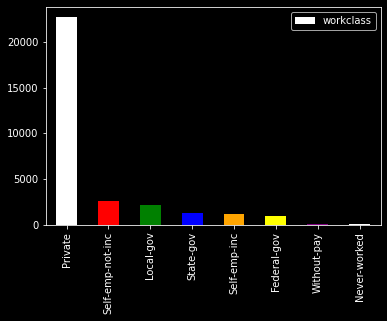

In [11]:
#check with "workclass" column , unique value
print(df.workclass.value_counts())
colors = ["white","red", "green", "blue", "orange", "yellow", "purple"] 
df.workclass.value_counts().plot.bar(color=colors,legend=True)


As we see the value counts - the Count the number of times a value occurs 
and Private having almost covered 74 % 
Let see in % ge .

In [12]:
print((df.workclass.value_counts()*100)/df.workclass.value_counts().sum())

Private             73.868186
Self-emp-not-inc     8.270138
Local-gov            6.812042
State-gov            4.224573
Self-emp-inc         3.632221
Federal-gov          3.124491
Without-pay          0.045566
Never-worked         0.022783
Name: workclass, dtype: float64


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


<AxesSubplot:>

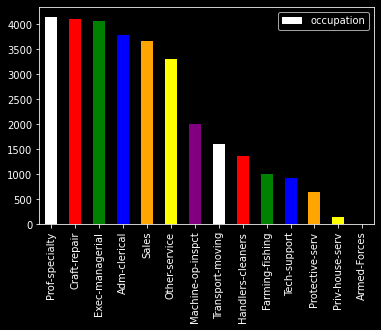

In [13]:
#check with "Occupation" column , unique value
print(df.occupation.value_counts())
colors = ["white","red", "green", "blue", "orange", "yellow", "purple"] 
df.occupation.value_counts().plot.bar(color=colors,legend=True)


In [14]:
#As we see the value counts - the Count the number of times a value occurs and 
#Private having almost covered 74 % Let see in % percentage

print((df.occupation.value_counts()*100)/df.occupation.value_counts().sum())

Prof-specialty       13.477440
Craft-repair         13.343968
Exec-managerial      13.236539
Adm-clerical         12.272934
Sales                11.882284
Other-service        10.726610
Machine-op-inspct     6.517351
Transport-moving      5.198906
Handlers-cleaners     4.459926
Farming-fishing       3.235888
Tech-support          3.021030
Protective-serv       2.112768
Priv-house-serv       0.485058
Armed-Forces          0.029299
Name: occupation, dtype: float64


United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

<AxesSubplot:>

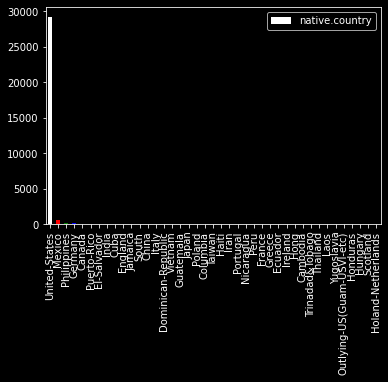

In [15]:
#check with "native.country" column , unique value
print(df["native.country"].value_counts())
colors = ["white","red", "green", "blue", "orange", "yellow", "purple"] 
df["native.country"].value_counts().plot.bar(color=colors,legend=True)

As we observe above most of the native.country is United-states
Let see in % percenatge , United satates having covered  91% 

In [16]:
print((df["native.country"].value_counts()*100)/df["native.country"].value_counts().sum())

United-States                 91.218963
Mexico                         2.010757
Philippines                    0.619176
Germany                        0.428420
Canada                         0.378385
Puerto-Rico                    0.356495
El-Salvador                    0.331478
India                          0.312715
Cuba                           0.297079
England                        0.281443
Jamaica                        0.253299
South                          0.250172
China                          0.234536
Italy                          0.228282
Dominican-Republic             0.218900
Vietnam                        0.209519
Guatemala                      0.200138
Japan                          0.193883
Poland                         0.187629
Columbia                       0.184502
Taiwan                         0.159485
Haiti                          0.137595
Iran                           0.134467
Portugal                       0.115705
Nicaragua                      0.106323


Filling the missing value with most common value in dataset i.e mode.

In [17]:
# imputing the missing values with mode
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [18]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.columns = ["age", "workclass", "final_weight", "education", "education_num", "martial_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

In [21]:
# As we observe education and education_num both are same , so we can drop one of the column
df.drop(['education'], axis = 1, inplace = True)

In [22]:
#catogrical column
catogrical_column = [column for column in df.columns if df[column].dtypes=='object']
print(catogrical_column)

['workclass', 'martial_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [23]:
#numerical_column
numerical_column = [column for column in df.columns if df[column].dtypes !='object']
print(numerical_column)

['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [24]:
df.head()

,age,workclass,final_weight,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [25]:
print("Sex : \n",df["sex"].value_counts())
print("Income: \n",df["income"].value_counts())
print("Race: \n",df["race"].value_counts())

Sex : 
 Male      21790
Female    10771
Name: sex, dtype: int64
Income: 
 <=50K    24720
>50K      7841
Name: income, dtype: int64
Race: 
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


In [26]:
# As we observe sex having the label
encode ={"sex":{"Male": 0, "Female": 1},
        "income":{"<=50K": 0, ">50K": 1}}
df = df.replace(encode)
df.head()

,age,workclass,final_weight,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,1,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,1,0,4356,40,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0


In [27]:
# encoding categorical variables
from sklearn import preprocessing

for feature in catogrical_column:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        

In [28]:
df.describe()

,age,workclass,final_weight,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.080679,2.611836,6.138755,1.446362,3.665858,0.330795,1077.648844,87.303830,40.437456,36.417155,0.240810
std,13.640433,1.107194,1.055500e+05,2.572720,1.506222,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047,0.427581
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,10.000000,2.000000,6.000000,1.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


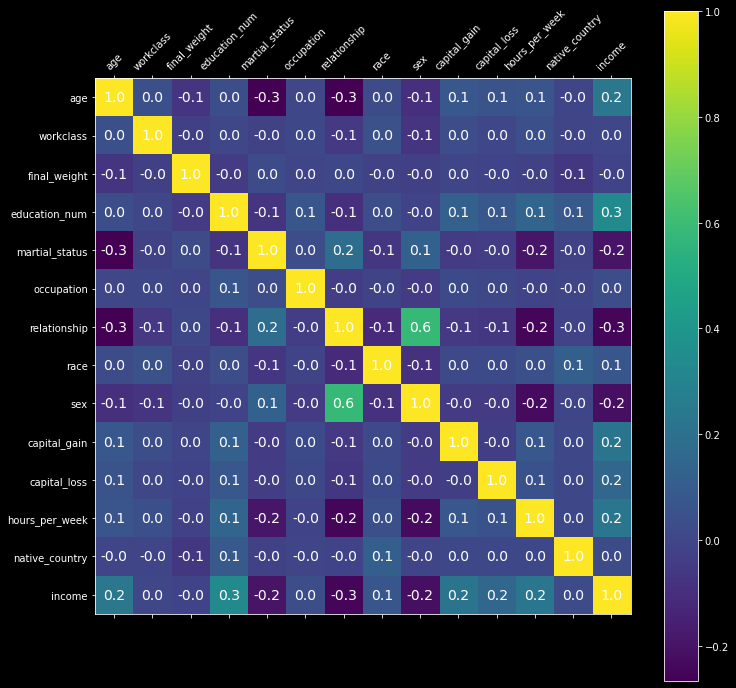

In [29]:
# ploting the correlation between the output(income) and individual features
rcParams['figure.figsize'] = 12, 12
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [30]:
# As we observe the correlation between Income and native_country ,occupation ,workclass,final_weight is zero.
# dropping ative_country ,occupation ,workclass,final_weight since it has 0 correlation
df.drop(["native_country" ,"occupation" ,"workclass","final_weight"], axis = 1, inplace = True)

In [31]:
df.dtypes

age               int64
education_num     int64
martial_status    int32
relationship      int32
race              int32
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
income            int64
dtype: object

In [32]:
# setting x as input features and y as target feature
X = df.drop(['income'], axis=1)
y = df['income']

In [33]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [57]:
def predict(estimators):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(random_state=0, n_estimators = estimators)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc_rfc = round(rfc.score(X_train, y_train) * 100, 2)
    #print(classification_report(y_test, y_pred))
    #print('accurancy: {}'.format(accuracy_score(y_test, y_pred)*100))
    df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - RandomForest'])
    df_out = pd.concat([y_test.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)
    
    from sklearn.ensemble import GradientBoostingClassifier
    gbc = GradientBoostingClassifier(random_state=0, n_estimators = estimators)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    acc_gbc = round(rfc.score(X_train, y_train) * 100, 2)
    #print(classification_report(y_test, y_pred))
    #print('accurancy: {}'.format(accuracy_score(y_test, y_pred)*100))
    df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - GradientBoosting'])
    df_out = pd.concat([df_out.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)
    
    from sklearn.ensemble import BaggingClassifier
    bagging_classifier = BaggingClassifier(random_state=0, n_estimators = estimators)
    bagging_classifier.fit(X_train, y_train)
    y_pred = bagging_classifier.predict(X_test)
    acc_bagging = round(bagging_classifier.score(X_train, y_train) * 100, 2)
    #print(classification_report(y_test, y_pred))
    #print('accurancy: {}'.format(accuracy_score(y_test, y_pred)*100))
    df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - Bagging'])
    df_out = pd.concat([df_out.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)
    return acc_rfc, acc_gbc, acc_bagging

In [59]:
rfc_dict = {}
gbc_dict = {}
bagging_dict = {}
for estimators_count in range(50, 101, 10):
    accurancy_rfc, accurancy_gbc, accurancy_bagging = predict(estimators_count)
    
    rfc_value = [(estimators_count, accurancy_rfc)]
    rfc_dict.update(rfc_value)
    
    gbc_value = [(estimators_count, accurancy_gbc)]
    gbc_dict.update(gbc_value)
    
    bagging_value = [(estimators_count, accurancy_bagging)]
    bagging_dict.update(bagging_value)
    
print(rfc_dict)
print(gbc_dict)
print(bagging_dict)


{50: 93.5, 60: 93.52, 70: 93.54, 80: 93.54, 90: 93.55, 100: 93.55}
{50: 93.5, 60: 93.52, 70: 93.54, 80: 93.54, 90: 93.55, 100: 93.55}
{50: 93.49, 60: 93.52, 70: 93.54, 80: 93.55, 90: 93.54, 100: 93.55}
